<a href="https://colab.research.google.com/github/andremartins7/DataHackersSurvey2019/blob/master/Resolucao_Mecanica_young_freedman_pg265_ex8_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook traz a simulação do exemplo livro 'Física I - Mecânica', Young & Freedman, 12ª edição, pg 265, exemplo 8.12.

É um problema de choque elástico, abaixo está o esquema do problema, desenhado pela criadora do notebook, para não infrigir o direitos de reprodução do livro.

Essas imagens serão exportadas em Python ao logo da simulação e você poderá reuni-las em um vídeo :)

Para rodar as células de código, o google colab vai pedir acesso ao seu google drive. Se você não se sentir confortável com isso, você pode copiar todo o código para a sua máquina e rodar no seu editor de Python. 


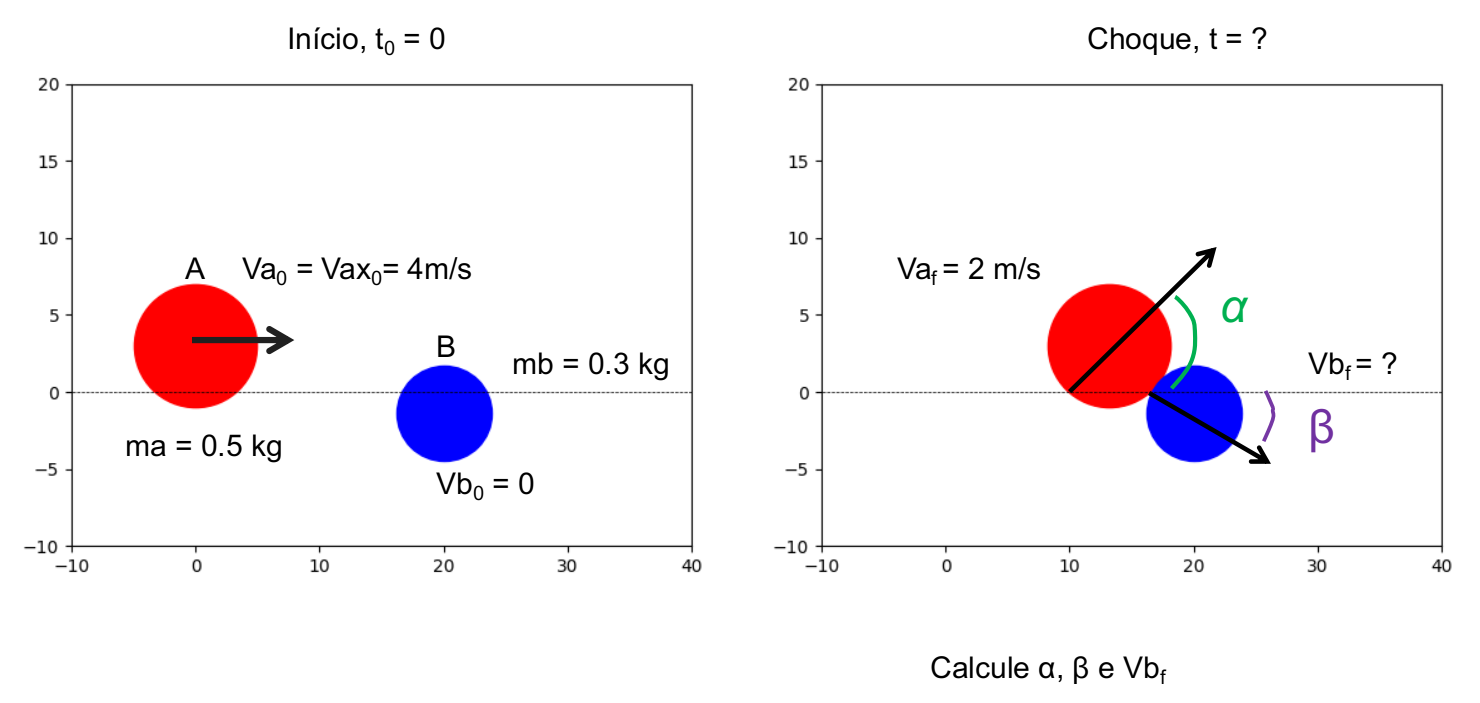

Choque elástico entre dois discos de hóquei em mesa sem atrito **(2D)**


---
Massa do disco A (vermelho) = 0.5 kg

Massa do disco B (azul) = 0.3 kg

---
Velocidade inicial do disco A = 4.0 m/s, apenas componente em x

Velocidade final do disco A  =  2.0 m/s direção desconhecida

---

Velocidade inicial do disco B = 0

---
**Calcule a velocidade final de B e os ângulos alfa e beta.**


Entendendo o problema:

*  É uma colisão bidimensional, os discos não estão alinhados. Logo, teremos que realizar a decomposição de velocidades em x e y.
*  O disco A está em x = 0, mas a posição em y não está descrita. Logo, provavelmente a posição em y não é necessária para resolver o problema. **Mas é necessário definir a coordenada em y para nossa representação na simulação.**


Como encontrar a posição do disco A em y? Trigonometria!
Admitindo que as linhas que definem os ângulos em relação ao eixo x passem pelos centros dos discos:

yA = RA sen(alfa) (acima da origem)

yB = -RB sen(beta) (abaixo da origem)



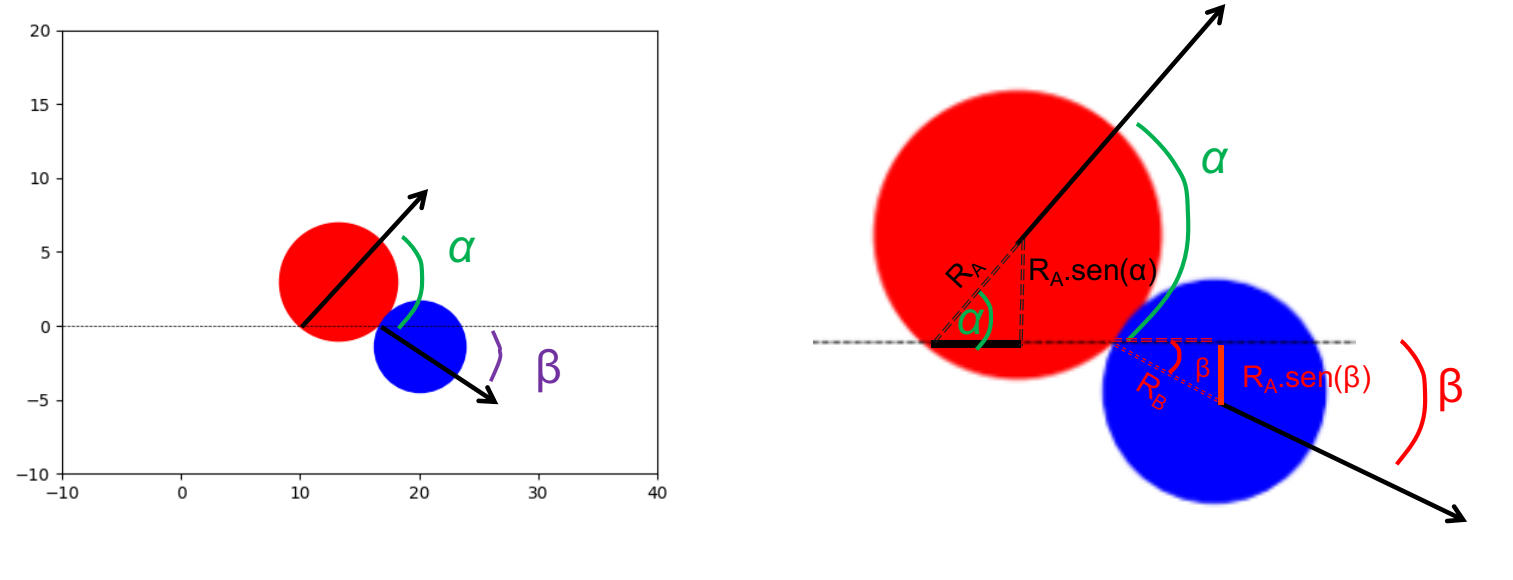

Importando o módulo numpy para realizar os cálculos de seno e cosseno, e o módulo matplotlib para poder plotar as imagens:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Agora vamos entrar com algumas informações do problema, massas e velocidades iniciais. Também é útil criar variáveis para os raios do discos, entenderemos porque ela é importante mais a frente. Os raios podem ser proporcionais às massas, para deixar a visualização mais intuitiva:


In [ ]:
massa_disco1 =  0.5 #Kilogramas
raio_disco_1 = massa_disco1*10 

massa_disco2 = 0.3 #Kilogramas
raio_disco_2 = massa_disco2*10 

Os ângulos alfa e beta são parte da solução do exemplo. Mas para a simualção correta, eles devem ser dados como input. Assim, devemos resolver o problema antes de começar a simulação. Transcrevendo a solução do livro:


*   Aplicar a conservação de energia cinética para colisão elástica, velocidade de b inicialmente nula:

    $\frac{1}{2}m_{a} (v_{a0}²) = \frac{1}{2}m_{a}(v_{af}²)+ \frac{1}{2}m_{b}(v_{bf}²)$

*   $v_{bf}^{2} = \frac{m_{a} (v_{a0}²) - m_{a}(v_{af}²)}{m_{b}}$

*   $v_{bf}$ = 4.47 m/s   

esse é o módulo da velocidade de B, para descobrir a direção aplicamos a conservação de momento linear, separadamente nas coordenadas x e y:


---


Em x:

(1)  =  $m_{a}v_{a0x} = m_{a}v_{afx} + m_{b}v_{bfx}$    



  velocidade inicial de A em x = 

(2) = v_{a0} = 4m/s         (2)



  velocidade final de A em x = módulo da velocidade final de A projetado em x:

(3) $v_{afx} = 2 cos(\alpha)  m/s$  
  
  
  velocidade final de B em x = módulo da velocidade encontrada  $v_{bf}$ projetada na direção x:

(4) = $v_{bfx} = 4.47 cos(\beta)  m/s$  


Substituindo 4,3,2 em 1:


(0.5kg)(4.0m/s) = (0.5kg)(2.0m/s)$cos(\alpha)$ + (0.3kg)(4.47m/s)$cos(\beta)$


---



Em y:

(1)  =  $0 = m_{a}v_{afy} + m_{b}v_{bfy}$    


  velocidade final de A em y = módulo da velocidade final de A projetado em y:

(2) $v_{afy} = 2 sen(\alpha)  m/s$ 

  
  velocidade final de B em y = módulo da velocidade encontrada  $v_{bf}$ projetada na direção y:

(3) = $v_{bfy} = 4.47 sen(\beta)  m/s$ **Obs: sentido negativo de y**

Substituindo 3,2 em 1:
  

0 = (0.5kg)(2.0m/s)$sen(\alpha)$ - (0.3kg)(4.47m/s)$sen(\beta)$

Usando o sistema de equações e a relação $sen^2(\beta) + cos^2(\beta)=1 $ para isolar $\beta$, chega-se a 

$\alpha = 36.9$°

$\beta = 26.6$°


Agora que podemos inserir os ângulos como input da simulação:

In [ ]:
alfa = 36.9

beta = -26.6

In [ ]:
posicaox_disco1_inicial = 0 #metros

velocidadex_disco1_inicial = 4 #metros/segundo

velocidadey_disco1_inicial = 0 #metros/segundo 

velocidade_total_disco1_inicial = (velocidadex_disco1_inicial**2 + velocidadey_disco1_inicial**2)**(0.5) #v ^2 = vx^2 + vy^2

velocidade_total_disco1_final = 2 #metros/segundo, direção desconhecida 




posicaox_disco2_inicial = 20 # metros, arbitrária, apenas para dar tempo de simulação antes da colisão

velocidadex_disco2_inicial = 0 #parada

velocidadey_disco2_inicial = 0 #parada

velocidade_total_disco2_inicial = (velocidadex_disco2_inicial**2 + velocidadey_disco2_inicial**2)**(0.5)  #vai dar zero


Para as posições y, vamos colocar as relações que enocntramos com trigonometria. As funções seno e cosseno do numpy levam agumento como radianos, assim a função de conversão de graus para radiano deve ser chamada:

In [ ]:
posicaoy_disco1_inicial = raio_disco_1*np.sin(np.deg2rad(alfa)) 

posicaoy_disco2_inicial = raio_disco_2*np.sin(np.deg2rad(beta)) 


Definindo a energia cinética inicial:

In [ ]:
energia_cinetica_inicial = 0.5*(massa_disco1*(velocidade_total_disco1_inicial**2)) + 0.5*(massa_disco2*(velocidade_total_disco2_inicial)**2)

Para visualizar a evolução no tempo, criamos uma lista no tempo, com passos curtos para que possamos ver o que acontece em pouco tempo de simulação. O comando abaixo cria uma lista de 0 a 1.95 segundos, com passos de 0.05 segundos. 

In [ ]:
tempos = np.arange(0,2,0.05)

Para realizar a simulação, devemos criar variáveis de posição e velocidade a serem atualizadas durante as iterações ao longo da lista de tempos. Para cada "passo no tempo" tiramos uma "foto" do sistema, guardando as posições dos centros dos discos (S) e velocidades (V) de cada disco:

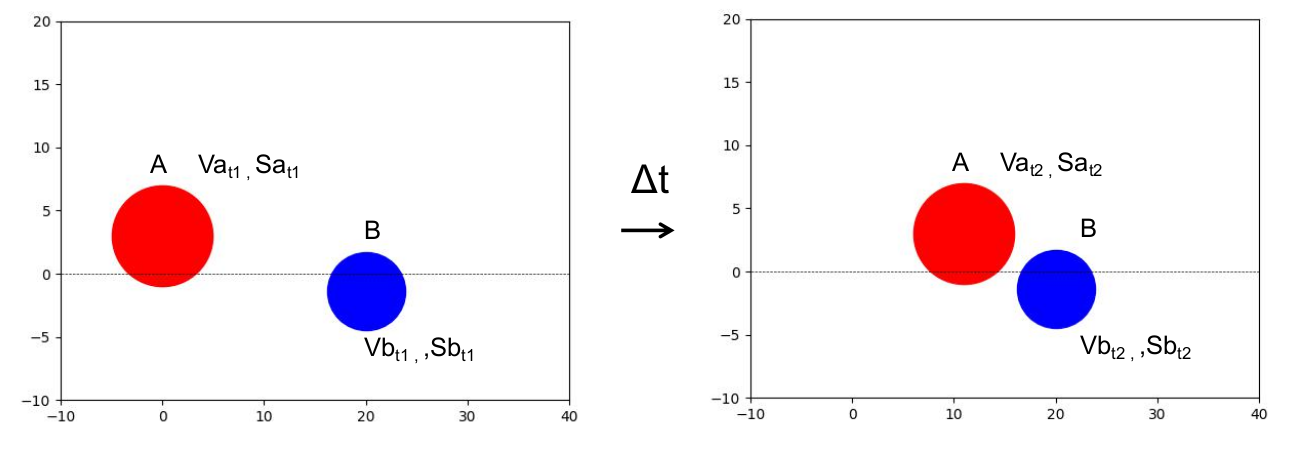

Antes de entrar no loop temporal, as posições dos centros e velocidades são iguais aos valores iniciais:

In [ ]:
posicaox_disco1 = posicaox_disco1_inicial
posicaoy_disco1 = posicaoy_disco1_inicial
velocidadex_disco1 = velocidadex_disco1_inicial
velocidadey_disco1 = velocidadey_disco1_inicial


posicaox_disco2 = posicaox_disco2_inicial
posicaoy_disco2 = posicaoy_disco2_inicial
velocidadex_disco2 = velocidadex_disco2_inicial
velocidadey_disco2 = velocidadey_disco2_inicial

Agora precisamos definir o que ocorrerá durante a simulação. Enquanto o disco A não toca o disco B, as velocidades permanecem inalteradas e as posições dos centros são atualizadas de acordo com as velocidades iniciais, o A se movendo e o B parado.

Quando A toca o disco B, as velocidades são atualizadas para as velocidades finais que calculamos anteriormente. 

Agora precisamos definir o que significa fisicamente e computacionalmente **"o disco A tocar o disco B".**

A superfície direita do disco A toca a superfície esquerda do disco B, isso pode ser definido como:

    posicaox_superficie_direita_disco1 = posicaox_superficie_esquerda_disco2 

Onde : 

    posicaox_superficie_direita_disco1 = raio_disco_1*np.cos(np.deg2rad(alfa)) + posicaox_disco1

    posicaox_superficie_esquerda_disco2 = -raio_disco_2*np.cos(np.deg2rad(beta)) + posicaox_disco2


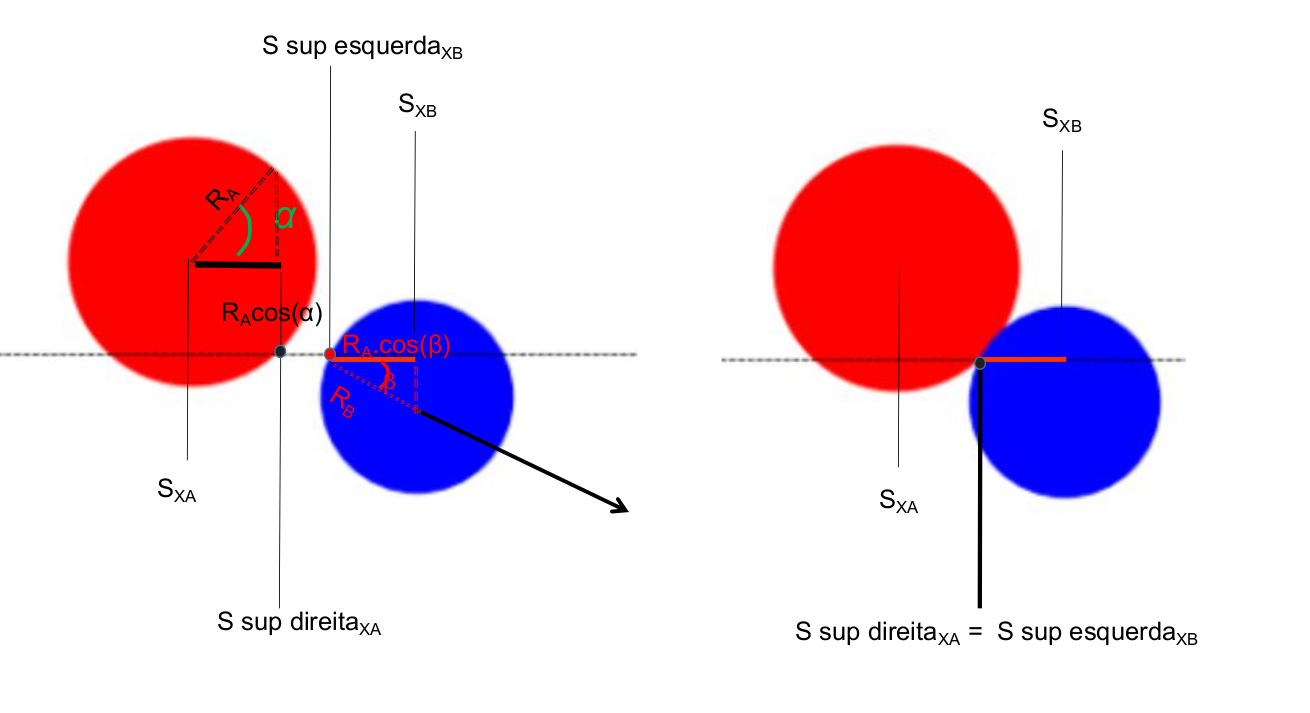

In [ ]:
posicaox_superficie_direita_disco1 = raio_disco_1*np.cos(np.deg2rad(alfa)) + posicaox_disco1_inicial
posicaox_superficie_esquerda_disco2 = -raio_disco_2*np.cos(np.deg2rad(beta)) + posicaox_disco2_inicial

Mas devemos notar uma coisa, como o tempo da simulação é dividido em passos, pode ser que a **igualdade exata** das posições das superfícies ocorra num momento **entre passos de tempo**, e não seja captada durante a simulação.
Assim, o choque não ocorreria.

Para resolver isso, podemos adicionar uma tolerância na posição, e dizer que a superfície direita de A deve estar **próxima** à superfície esquerda de B, com uma pequena tolerância de alguns centímetros. Uma forma de escrever isso computacionalmente é: 

    (posicaox_superficie_direita_disco1  <  posicaox_superficie_esquerda_disco2 + tolerancia_contato) and (posicaox_superficie_direita_disco1 > posicaox_superficie_esquerda_disco2 -tolerancia_contato)

Agora podemos definir a tolerância de contato e escrever o que acontece nesse loop temporal:

Para cada passo no tempo:

    atualize as posições dos centros dos discos de acordo a posição anterior com a (velocidade*passo do tempo)
    atualise as posições das superfícies dos discos de acordo com novas posições os centros  

    se a condição de choque é verdade:
        mude as velocidades de A para v_a final dada
        mude a velocidade de B de acordo com a conservação de energia cinética
        mostre a velocidade de B para verificar se está igual ao exemplo
    me mostre as novas posições de A e B em um plot 
    salve o plot e limpe-o para o próximo passo


Um pequeno detalhe é quanto ao nome das imagens. Na pasta a imagem 1050 vai aparecer antes de 150, por exemplo. Assim podemos estabelecer uma pequena regra de nomes acrescentando zeros à esquerda. Assim, seriam : 0000.png, 0100.png, 1050.png.

O seguinte bloco de código traduz isso em Python.
As imagens da simulação serão guardadas na pasta content.

In [ ]:
for i in range (0, len(tempos)):
#evoluçao temporal da disco 1

  posicaox_disco1 = posicaox_disco1 + velocidadex_disco1*tempos[i]
  posicaoy_disco1 = posicaoy_disco1 + velocidadey_disco1*tempos[i]

	#evolucao da superficie dos discos em funcao dos centros
  posicaox_superficie_direita_disco1 = raio_disco_1*np.cos(np.deg2rad(alfa)) + posicaox_disco1
  posicaox_superficie_esquerda_disco2 = -raio_disco_2*np.cos(np.deg2rad(beta)) + posicaox_disco2


	#evolucao temporal da disco2:
  posicaox_disco2 = posicaox_disco2 + velocidadex_disco2*tempos[i]
  posicaoy_disco2 = posicaoy_disco2 + velocidadey_disco2*tempos[i]
  
  tolerancia_contato= 0.25*raio_disco_2
  
  if (posicaox_superficie_direita_disco1  <  posicaox_superficie_esquerda_disco2 + tolerancia_contato) and (posicaox_superficie_direita_disco1 > posicaox_superficie_esquerda_disco2 -tolerancia_contato):
		#colisao, aplicar:
		#1) a conservação de energia cinética total permite a obtenção da velocidade total final da disco2:
    velocidade_total_disco2_final = ((1/massa_disco2)*(massa_disco1*(velocidade_total_disco1_inicial**2) -   massa_disco1*(velocidade_total_disco1_final**2)))**0.5 
    print("A velocidade total final da disco2 é {} m/s".format(velocidade_total_disco2_final))
		

		#2)atualizar as velocidades dos discos 1 e 2 nas duas coordenadas:
    velocidadex_disco1 = velocidade_total_disco1_final*np.cos(np.deg2rad(alfa)) 
    velocidadey_disco1 = velocidade_total_disco1_final*np.sin(np.deg2rad(alfa)) 
    velocidadex_disco2 = velocidade_total_disco2_final*np.cos(np.deg2rad(beta))
    velocidadey_disco2 = velocidade_total_disco2_final*np.sin(np.deg2rad(beta)) 



	#mostrando em forma de plot :
	#plot de uma linha horizontal em y = 0:
  plt.hlines(y = 0, xmin = -20, xmax = 50, linestyle = "--", color = "black", linewidth = 0.5)

	#plot do primeiro disco
  plt.scatter(posicaox_disco1, posicaoy_disco1, color = 'red', s= 1000*raio_disco_1) #s =  tamanho proporcional ao raio * um fator  1000 ajustado para correta visualição no python

  #plot do segundo disco sobreposto
  plt.scatter(posicaox_disco2, posicaoy_disco2,  color = 'blue', s = 1000*raio_disco_2)
  plt.xlim(-10,40)
  plt.ylim(-10,20)
  tempo_no_nome_do_arquivo_em_mili_segundos = int(tempos[i]*1000)
  if tempo_no_nome_do_arquivo_em_mili_segundos < 10:
    tempo_no_nome_do_arquivo_em_mili_segundos = "000"+str(tempo_no_nome_do_arquivo_em_mili_segundos)
  elif tempo_no_nome_do_arquivo_em_mili_segundos < 100:
    tempo_no_nome_do_arquivo_em_mili_segundos = "00"+str(tempo_no_nome_do_arquivo_em_mili_segundos)
  elif tempo_no_nome_do_arquivo_em_mili_segundos < 1000:
    tempo_no_nome_do_arquivo_em_mili_segundos = "0"+str(tempo_no_nome_do_arquivo_em_mili_segundos)
  plt.savefig(str(tempo_no_nome_do_arquivo_em_mili_segundos)+".png", )
  plt.close() #reseta a imagem


Pronto! Agora as imagens já foram geradas na ordem correta na sua pasta content.